## Time Series Analysis by SARIMAX model

### Imports

In [2]:
import numpy as np 
import pandas as pd 
import itertools
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Read the Data

In [4]:
#Training Data
train = pd.read_csv('../input/predice-el-futuro/train_csv.csv')
train.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


In [5]:
#Testing Data Shape
train.shape

(80, 3)

In [6]:
#Checking Null Values
train.isnull().sum()

id         0
time       0
feature    0
dtype: int64

In [7]:
#Checking Data Types
train.dtypes

id           int64
time        object
feature    float64
dtype: object

In [8]:
#Converting time object to datetime
train['time']= pd.to_datetime(train['time']) 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id       80 non-null     int64         
 1   time     80 non-null     datetime64[ns]
 2   feature  80 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.0 KB


In [9]:
#Min time
train['time'].min()

Timestamp('2019-03-19 00:00:00')

In [10]:
#Max time
train['time'].max()

Timestamp('2019-03-19 00:13:10')

In [11]:
# Checking Anomalies by using Describe 
train.describe()

,id,feature
count,80.0000,80.000000
mean,39.5000,147.496375
std,23.2379,96.846260
min,0.0000,21.360000
25%,19.7500,66.730000
50%,39.5000,125.240000
75%,59.2500,199.820000
max,79.0000,469.720000


In [12]:
#Drop id column
train=train.drop(columns='id',axis=1)

In [13]:
train.head()

,time,feature
0,2019-03-19 00:00:00,237.97
1,2019-03-19 00:00:10,57.93
2,2019-03-19 00:00:20,90.53
3,2019-03-19 00:00:30,260.75
4,2019-03-19 00:00:40,49.70


In [14]:
# Indexing with time series data
train = train.set_index('time')
train.index

DatetimeIndex(['2019-03-19 00:00:00', '2019-03-19 00:00:10',
               '2019-03-19 00:00:20', '2019-03-19 00:00:30',
               '2019-03-19 00:00:40', '2019-03-19 00:00:50',
               '2019-03-19 00:01:00', '2019-03-19 00:01:10',
               '2019-03-19 00:01:20', '2019-03-19 00:01:30',
               '2019-03-19 00:01:40', '2019-03-19 00:01:50',
               '2019-03-19 00:02:00', '2019-03-19 00:02:10',
               '2019-03-19 00:02:20', '2019-03-19 00:02:30',
               '2019-03-19 00:02:40', '2019-03-19 00:02:50',
               '2019-03-19 00:03:00', '2019-03-19 00:03:10',
               '2019-03-19 00:03:20', '2019-03-19 00:03:30',
               '2019-03-19 00:03:40', '2019-03-19 00:03:50',
               '2019-03-19 00:04:00', '2019-03-19 00:04:10',
               '2019-03-19 00:04:20', '2019-03-19 00:04:30',
               '2019-03-19 00:04:40', '2019-03-19 00:04:50',
               '2019-03-19 00:05:00', '2019-03-19 00:05:10',
               '2019-03-

###  Visualizing feature time series data

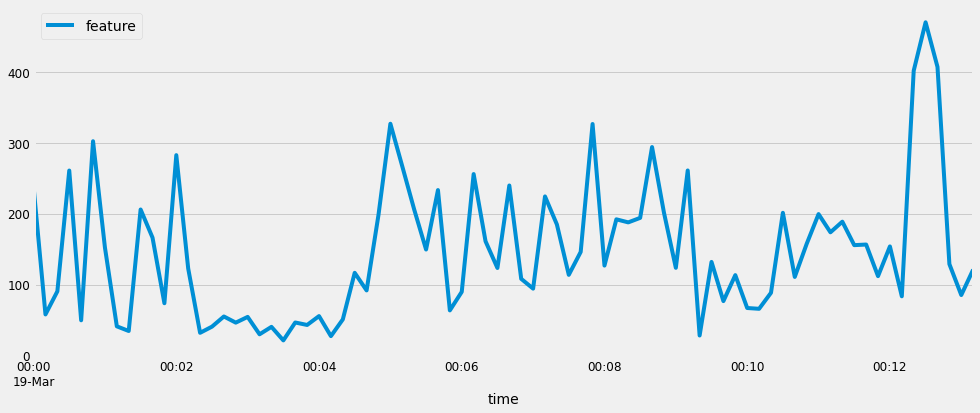

In [16]:
train.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. There is always a strong upward trend within any single Day with a couple of High Values in the last minutes.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

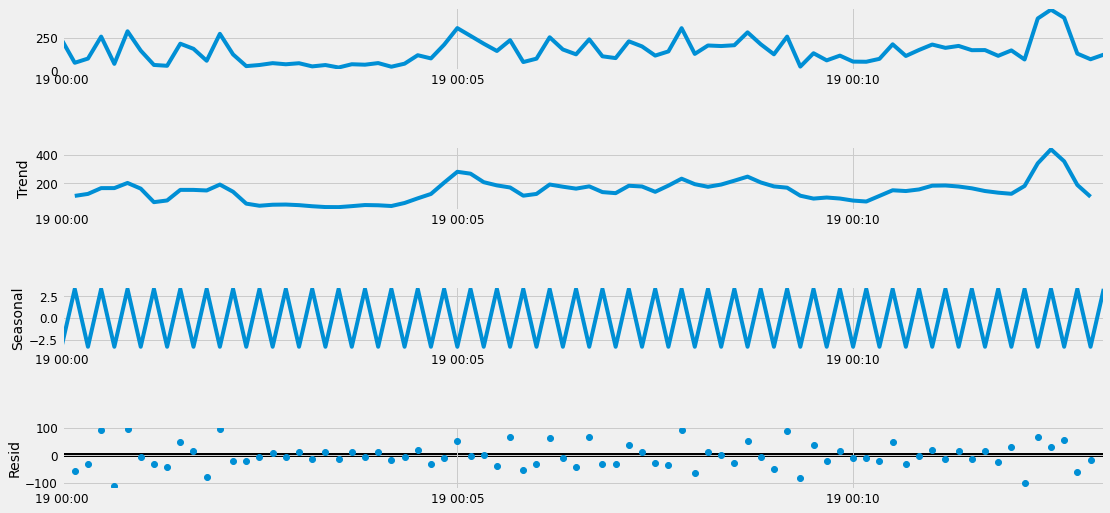

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
season = seasonal_decompose(train, freq=2)
fig = season.plot();
fig.set_size_inches(18,8)

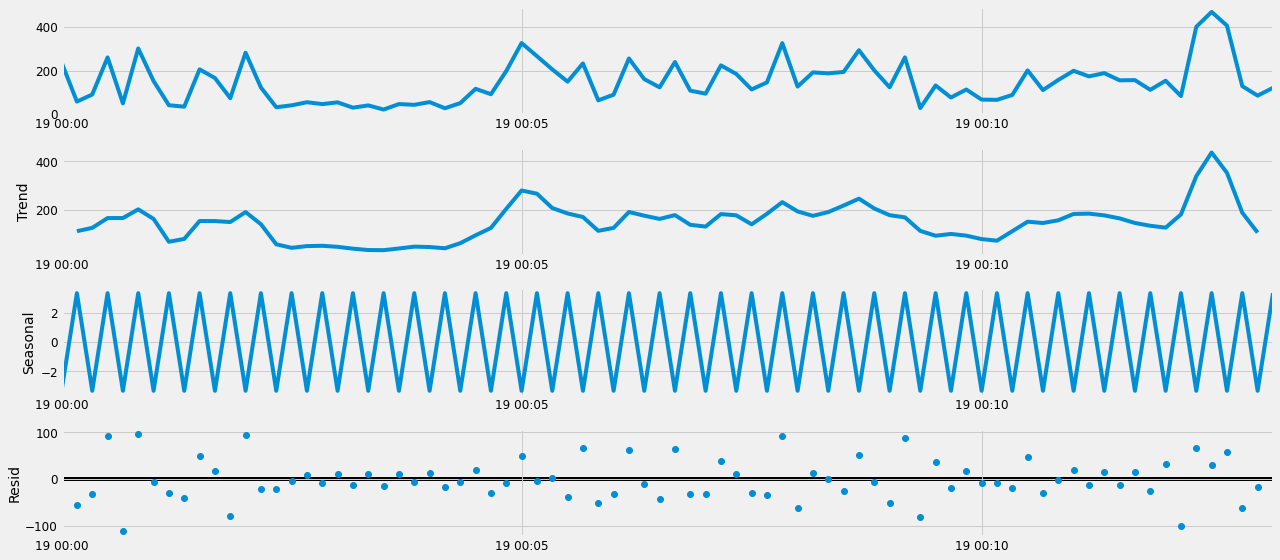

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(train, model='additive',freq=2)
fig = decomposition.plot()
plt.show()

### Stastical testing

In [20]:
#Dickey Fuller Test
adfinput = adfuller(train['feature'])
adftest = pd.Series(adfinput[0:4], index=['Dickey Fuller Statistical Test', 'P-value',
                                          'Used Lags', 'Number of comments used'])
adftest = round(adftest,4)
    
for key, value in adfinput[4].items():
    adftest["Critical Value (%s)"%key] = value.round(4) 
adftest

Dickey Fuller Statistical Test    -5.9459
P-value                            0.0000
Used Lags                          0.0000
Number of comments used           79.0000
Critical Value (1%)               -3.5160
Critical Value (5%)               -2.8989
Critical Value (10%)              -2.5867
dtype: float64

In [21]:
#Kpss
kpss_input = kpss(train['feature'])
kpss_test = pd.Series(kpss_input[0:3], index=['Statistical Test KPSS', 'P-Value', 'Used Lags'])
kpss_test = round(kpss_test,4)
    
for key, value in kpss_input[3].items():
    kpss_test["Critical Value (%s)"%key] = value 
kpss_test

Statistical Test KPSS     0.2827
P-Value                   0.1000
Used Lags                12.0000
Critical Value (10%)      0.3470
Critical Value (5%)       0.4630
Critical Value (2.5%)     0.5740
Critical Value (1%)       0.7390
dtype: float64

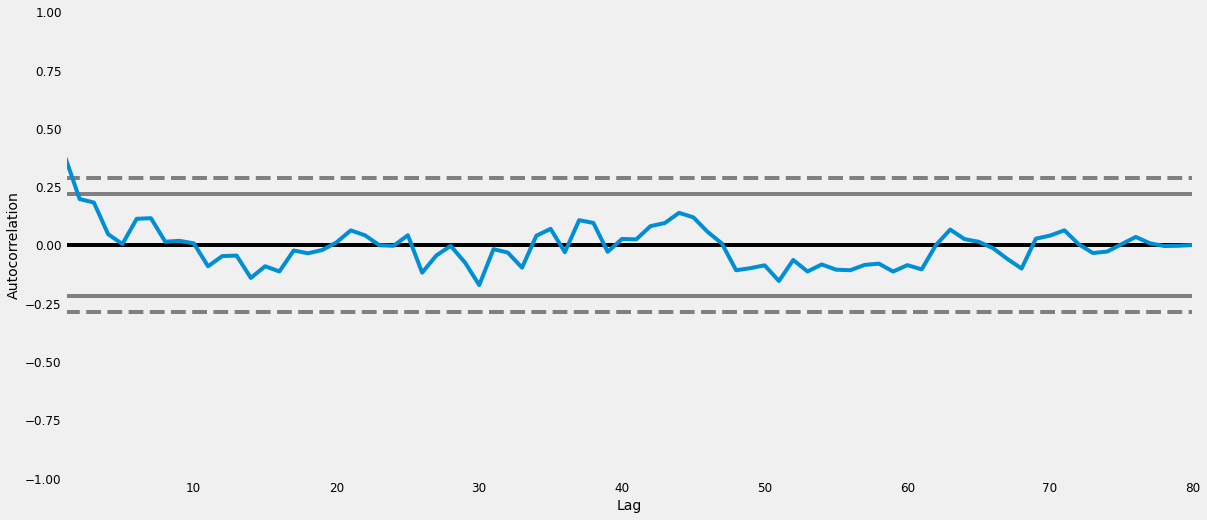

In [22]:
#Autocorrelation Plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train['feature'])
plt.show()

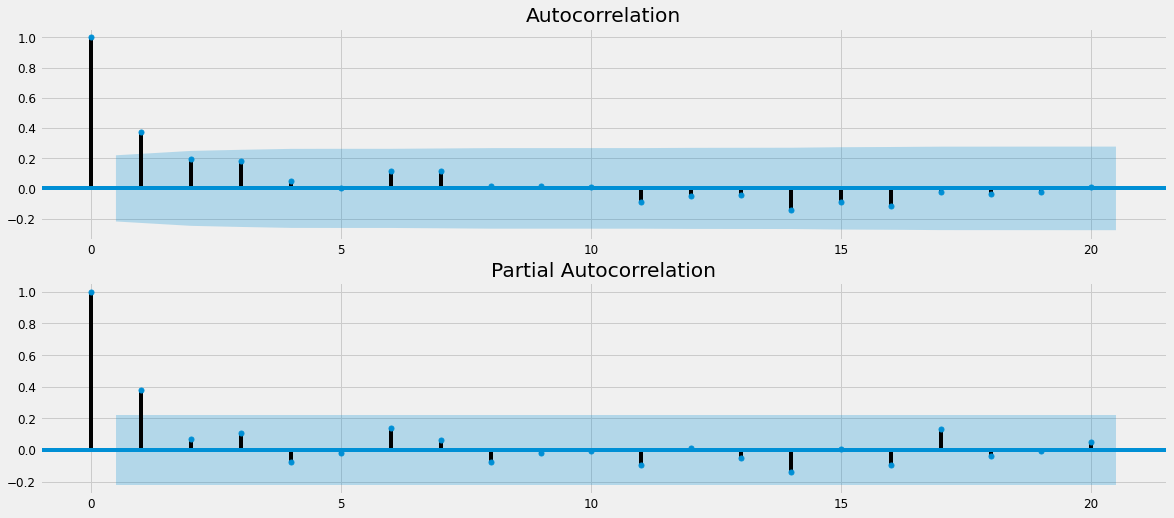

In [23]:
# ACF and PACF Plots
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(train, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(train, ax=pyplot.gca())
pyplot.show()

### Time series forecasting with ARIMA
We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

Parameter Selection for the ARIMA Time Series Model

In [24]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


### SARIMAX

In [26]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train['feature'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1042.4035372531396
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:865.3374454694697
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:848.4679420620186
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:680.1241081994293
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:856.5691270639311
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:834.0048626489337
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:696.4451555075179
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:682.8849026061968
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:988.1740013827833
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:821.6035769113821
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:827.6027531424521
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:663.1898764125747
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:840.3962302357454
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:816.3934247698369
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:691.7023215614167
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:664.5347022243452
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:951.5451699616596
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:793.1447566476651
ARIMA(0, 

In [27]:
mod = sm.tsa.statespace.SARIMAX(train['feature'],
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4032      0.125      3.218      0.001       0.158       0.649
ma.L1         -1.0000      0.200     -4.998      0.000      -1.392      -0.608
ma.S.L12      -0.6355      0.239     -2.661      0.008      -1.104      -0.167
sigma2      1.091e+04   1.83e-05   5.95e+08      0.000    1.09e+04    1.09e+04


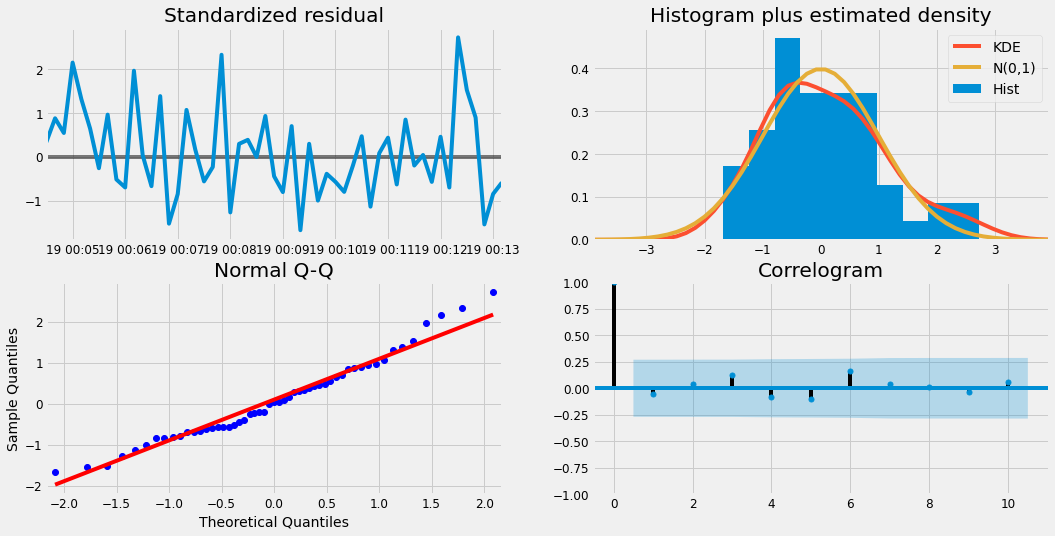

In [28]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Validating forecasts

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2019-03-19 00:10:00 to the end of the data.

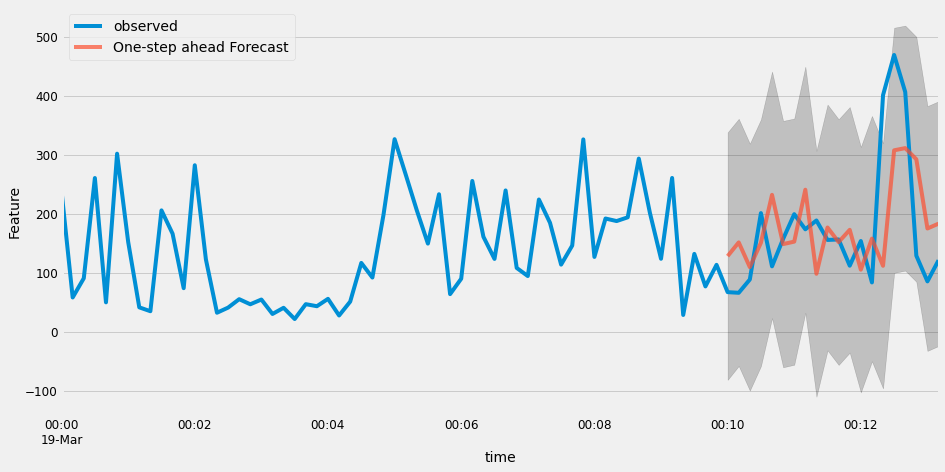

In [29]:
pred = results.get_prediction(start=pd.to_datetime('2019-03-19 00:10:00'), dynamic=False)
pred_ci = pred.conf_int()

ax = train['feature'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('time')
ax.set_ylabel('Feature')
plt.legend()

plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year.

In [30]:
y_forecasted = pred.predicted_mean
y_truth = train['feature']['2019-03-19 00:10:00':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 10686.49


In [31]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 103.38


In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator—it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales. Our furniture daily sales range from around 400 to over 1200. In my opinion, this is a pretty good model so far

### Producing and visualizing forecasts

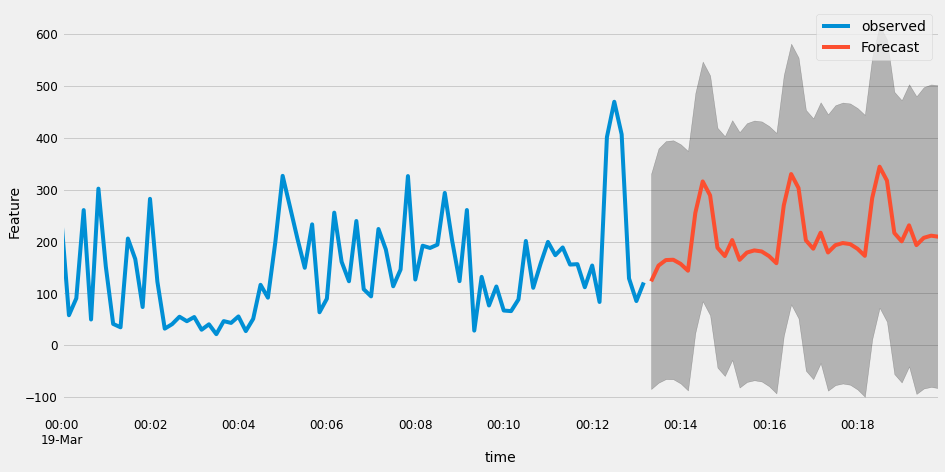

In [32]:
pred_uc = results.get_forecast(steps=40)
pred_ci = pred_uc.conf_int()

ax = train['feature'].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('time')
ax.set_ylabel('Feature')

plt.legend()
plt.show()

Our model clearly captured furniture sales seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

The above time series analysis for furniture makes me curious about other categories, and how do they compare with each other onver time. Therefore, we are going to compare time series of furniture and office supplier.

In [34]:
pred_uc.predicted_mean

2019-03-19 00:13:20    123.262260
2019-03-19 00:13:30    153.652305
2019-03-19 00:13:40    164.341354
2019-03-19 00:13:50    164.946407
2019-03-19 00:14:00    157.037080
2019-03-19 00:14:10    143.829856
2019-03-19 00:14:20    255.458691
2019-03-19 00:14:30    316.004876
2019-03-19 00:14:40    289.162273
2019-03-19 00:14:50    188.206709
2019-03-19 00:15:00    171.997675
2019-03-19 00:15:10    202.927760
2019-03-19 00:15:20    164.722403
2019-03-19 00:15:30    178.844547
2019-03-19 00:15:40    182.974483
2019-03-19 00:15:50    180.934943
2019-03-19 00:16:00    171.959333
2019-03-19 00:16:10    158.322192
2019-03-19 00:16:20    269.777685
2019-03-19 00:16:30    330.253981
2019-03-19 00:16:40    303.383199
2019-03-19 00:16:50    202.416273
2019-03-19 00:17:00    186.202658
2019-03-19 00:17:10    217.130897
2019-03-19 00:17:20    178.924794
2019-03-19 00:17:30    193.046638
2019-03-19 00:17:40    197.176453
2019-03-19 00:17:50    195.136865
2019-03-19 00:18:00    186.161235
2019-03-19 00:

In [35]:
# Converting y_pred to a dataframe which is an array
ytest= pd.DataFrame(pred_uc.predicted_mean)

In [36]:
ytest

,0
2019-03-19 00:13:20,123.262260
2019-03-19 00:13:30,153.652305
2019-03-19 00:13:40,164.341354
2019-03-19 00:13:50,164.946407
2019-03-19 00:14:00,157.037080
2019-03-19 00:14:10,143.829856
2019-03-19 00:14:20,255.458691
2019-03-19 00:14:30,316.004876
2019-03-19 00:14:40,289.162273
2019-03-19 00:14:50,188.206709


In [37]:
#Reset Index
ytest = ytest.reset_index(drop=True)

In [38]:
ytest

,0
0,123.262260
1,153.652305
2,164.341354
3,164.946407
4,157.037080
5,143.829856
6,255.458691
7,316.004876
8,289.162273
9,188.206709


In [40]:
#Testing Data
test=pd.read_csv('../input/predice-el-futuro/test_csv.csv')
test.head()

,id,time
0,80,2019-03-19 00:13:20
1,81,2019-03-19 00:13:30
2,82,2019-03-19 00:13:40
3,83,2019-03-19 00:13:50
4,84,2019-03-19 00:14:00


In [41]:
#Converting time object to datetime
test['time']= pd.to_datetime(test['time']) 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      40 non-null     int64         
 1   time    40 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 768.0 bytes


In [42]:
#Adding two Dataframes
test_pred = pd.concat([test, ytest], axis=1)

In [43]:
test_pred

,id,time,0
0,80,2019-03-19 00:13:20,123.262260
1,81,2019-03-19 00:13:30,153.652305
2,82,2019-03-19 00:13:40,164.341354
3,83,2019-03-19 00:13:50,164.946407
4,84,2019-03-19 00:14:00,157.037080
5,85,2019-03-19 00:14:10,143.829856
6,86,2019-03-19 00:14:20,255.458691
7,87,2019-03-19 00:14:30,316.004876
8,88,2019-03-19 00:14:40,289.162273
9,89,2019-03-19 00:14:50,188.206709


In [44]:
#Adding column name
test_pred['feature']=test_pred[0]

In [45]:
test_pred

,id,time,0,feature
0,80,2019-03-19 00:13:20,123.262260,123.262260
1,81,2019-03-19 00:13:30,153.652305,153.652305
2,82,2019-03-19 00:13:40,164.341354,164.341354
3,83,2019-03-19 00:13:50,164.946407,164.946407
4,84,2019-03-19 00:14:00,157.037080,157.037080
5,85,2019-03-19 00:14:10,143.829856,143.829856
6,86,2019-03-19 00:14:20,255.458691,255.458691
7,87,2019-03-19 00:14:30,316.004876,316.004876
8,88,2019-03-19 00:14:40,289.162273,289.162273
9,89,2019-03-19 00:14:50,188.206709,188.206709


In [46]:
#Which are not require removing that columns
test_pred=test_pred.drop(columns=['time',0],axis=1)

In [47]:
test_pred

,id,feature
0,80,123.262260
1,81,153.652305
2,82,164.341354
3,83,164.946407
4,84,157.037080
5,85,143.829856
6,86,255.458691
7,87,316.004876
8,88,289.162273
9,89,188.206709


In [48]:
#Final Solution file
test_pred.to_csv('solution.csv',index=False)